In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('Brickset-Sets-2000.csv', sep = ',')
df2 = pd.read_csv('Brickset-Sets-2001.csv', sep = ',')
df3 = pd.read_csv('Brickset-Sets-2002.csv', sep = ',')
df4 = pd.read_csv('Brickset-Sets-2003.csv', sep = ',')
df5 = pd.read_csv('Brickset-Sets-2004.csv', sep = ',')
df6 = pd.read_csv('Brickset-Sets-2005.csv', sep = ',')
df7 = pd.read_csv('Brickset-Sets-2006.csv', sep = ',')
df8 = pd.read_csv('Brickset-Sets-2007.csv', sep = ',')
df9 = pd.read_csv('Brickset-Sets-2008.csv', sep = ',')
df10 = pd.read_csv('Brickset-Sets-2009.csv', sep = ',')
df11 = pd.read_csv('Brickset-Sets-2010.csv', sep = ',')
df12 = pd.read_csv('Brickset-Sets-2011.csv', sep = ',')
df13 = pd.read_csv('Brickset-Sets-2012.csv', sep = ',')
df14 = pd.read_csv('Brickset-Sets-2013.csv', sep = ',')
df15 = pd.read_csv('Brickset-Sets-2014.csv', sep = ',')
df16 = pd.read_csv('Brickset-Sets-2015.csv', sep = ',')
df17 = pd.read_csv('Brickset-Sets-2016.csv', sep = ',')
df18 = pd.read_csv('Brickset-Sets-2017.csv', sep = ',')
df19 = pd.read_csv('Brickset-Sets-2018.csv', sep = ',')
df20 = pd.read_csv('Brickset-Sets-2019.csv', sep = ',')
df21 = pd.read_csv('Brickset-Sets-2020.csv', sep = ',')
df22 = pd.read_csv('Brickset-Sets-2021.csv', sep = ',')
df23 = pd.read_csv('Brickset-Sets-2022.csv', sep = ',')
df24 = pd.read_csv('Brickset-Sets-2023.csv', sep = ',')

data = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24]

In [3]:
concatenated_df = pd.concat(data, ignore_index=True) #złączenie wszystkich wczytanych danych

selected_columns_df = concatenated_df[['Year', 'Theme', 'Set name']] #pozostawienie tylko 3 wybranych kolumn

filtered_df = selected_columns_df.query('Theme not in ["Gear", "Collectable Minifigures"]') #wyrzucenie merchu oraz figurek z kategorii (nie są to zestawy do złożenia)

grouped_data = filtered_df.groupby(['Year', 'Theme']).size().reset_index(name='Count') #pogrupowane dane według roku i tematu oraz policzenie liczby wystąpień

# Znalezienie najczęściej pojawiającego się tematu dla każdego roku
top1_theme_per_year = grouped_data.loc[grouped_data.groupby('Year')['Count'].idxmax()]

print(top1_theme_per_year)

     Year             Theme  Count
7    2000       Bulk Bricks     71
33   2001             Duplo     56
62   2002           Explore     68
104  2003            Sports     55
115  2004          Bionicle     55
143  2005          Bionicle     46
170  2006          Bionicle     47
203  2007             Duplo     34
229  2008              City     46
264  2009       Promotional     38
281  2010             Duplo     39
320  2011           Ninjago     43
353  2012           Ninjago     48
377  2013  Legends of Chima     57
414  2014  Legends of Chima     63
461  2015         Star Wars     68
496  2016         Star Wars     66
526  2017         Star Wars     66
557  2018         Star Wars     70
592  2019         Star Wars     63
602  2020              City     58
639  2021              City     59
676  2022              City     64
707  2023              City     62


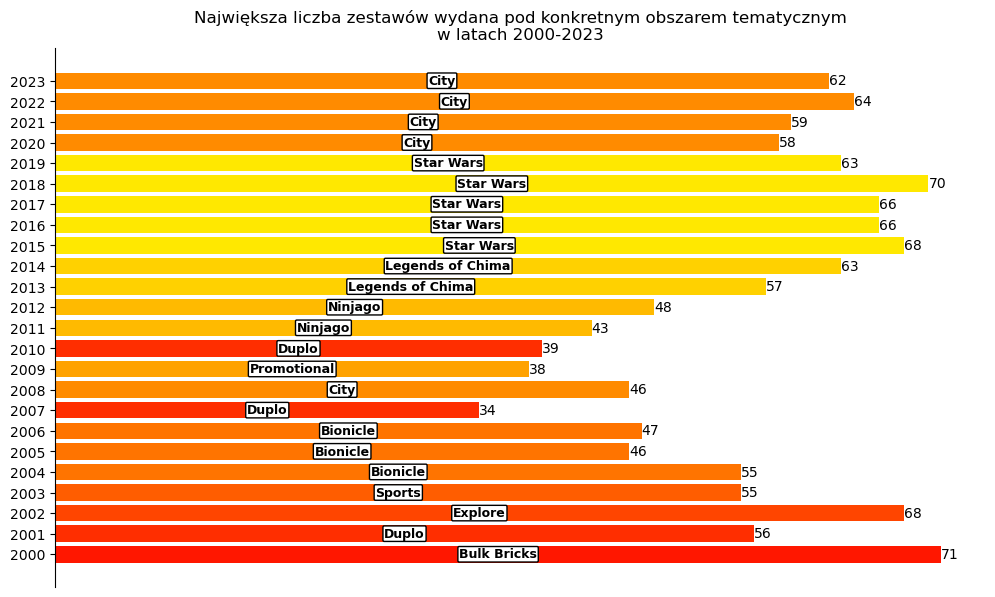

In [4]:
# Tworzenie unikalnych kolorów dla każdego tematu
colors = sns.color_palette("autumn", n_colors=len(top1_theme_per_year['Theme'].unique())) #n_colors = liczba kolorów, w tym przypadku unikalny dla każdego z tematu

# Przypisanie kolorów do tematów
theme_colors = dict(zip(top1_theme_per_year['Theme'].unique(), colors))

theme_names = top1_theme_per_year['Theme']

plt.figure(figsize=(12, 7))

plot = plt.barh(top1_theme_per_year['Year'], top1_theme_per_year['Count'], color=top1_theme_per_year['Theme'].map(theme_colors))

plt.yticks(top1_theme_per_year['Year']) #wyświetlenie każdego roku na osi Y

plt.bar_label(plot, labels = theme_names, label_type = 'center', color = 'black', fontsize = 9, weight='bold',
              bbox = dict(facecolor = 'white', edgecolor = 'black', boxstyle = 'round, pad=0.1')) #dodanie etykiet na słupkach

#wyswietlenie liczby obok każdego słupka
for bar, count in zip(plot, top1_theme_per_year['Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(count), va='center')

#usuwanie osi (widocznych kresek) oraz podziałki pod osią X
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.xlabel('Wyprodukowane zestawy')
plt.title('Największa liczba zestawów wydana pod konkretnym obszarem tematycznym\nw latach 2000-2023')

plt.savefig('najpopularniejszy temat pod wzgledem wydanych zestawow.pdf')
plt.show()
